In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
ls

 Volume in drive G is New Volume
 Volume Serial Number is AAA4-0BD0

 Directory of G:\Sanit_Horizontal\Data Analysis\Dharin Project files\Friction Measurement Issues

16-12-2022  14:01    <DIR>          .
16-12-2022  14:01    <DIR>          ..
16-12-2022  13:47    <DIR>          .ipynb_checkpoints
16-12-2022  13:45        31,206,173 _30N_Vel.xlsx
14-12-2022  16:33        40,199,211 _40N_Vel.xlsx
16-12-2022  13:42        44,132,769 _50N_Vel.xlsx
16-12-2022  13:46        17,990,829 30N.pkl
16-12-2022  12:01        19,296,071 40N.pkl
16-12-2022  11:56        16,273,546 50N.pkl
15-12-2022  10:58           117,945 Data Input.ipynb
15-12-2022  18:14           540,849 Data Input_rev_15_12.ipynb
16-12-2022  09:56           496,030 Data Input_rev2_15_12.ipynb
16-12-2022  14:01             6,408 Data Processing.ipynb
16-12-2022  13:47            21,364 data_pickle_final.ipynb
16-12-2022  11:51            53,070 data_pickle_test.ipynb
              12 File(s)    170,334,265 bytes
               3

In [25]:
def test_vel(df):
    
    metric = df.quantile(
    q=0.5,                      # The percentile to calculate
    axis=0,                     # The axis to calculate the percentile on
    numeric_only=True,          # To calculate only for numeric columns
    interpolation='linear'      # The type of interpolation to use when the quantile is between 2 values
    )
    
    temp = df[df['vel'] > metric[0]]
    temp.reset_index(inplace = True, drop = True)
    
    return temp
       

In [290]:
dict = pd.read_pickle('50N.pkl')

In [291]:
i = 5

In [292]:
df= pd.DataFrame(dict[list(dict.keys())[5]])

In [293]:
df.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos
0,0.0208,111.8160,49.8173,162.9170,16.315,28.0243,14.38
1,0.0880,131.6923,49.7733,166.1880,16.284,28.0162,14.40
2,0.1863,148.2792,49.7653,169.0938,16.278,28.0130,14.40
3,0.2655,156.7153,49.7653,172.5556,16.226,28.0148,14.42
4,0.3942,159.1714,49.7853,174.9311,16.187,28.0103,14.42


In [294]:
data = test_vel(df)

In [295]:
data.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos
0,5.9550,167.9449,49.9640,179.6674,16.395,31.5384,14.9
1,5.9504,175.1627,49.9947,189.6830,16.705,31.7052,14.9
2,5.9550,175.3182,50.0107,193.9427,16.614,31.7636,14.9
3,5.9930,179.2381,49.9720,192.3197,16.471,31.9033,14.9
4,6.0999,175.8675,49.9880,182.8562,16.311,31.9891,14.9


# Brake Related Data

In [296]:
# Brake Disc Diameter
Db = 280*1e-2

# Disc Inner Radius
# Ri = 120*1e-3

# Disc Outer Radius
# Ro = 240*1e-3

# Number of pad surfaces
Ns = 2

# Number of pistons per pad
Np = 2

# Rm = (Ro + Ri)/2.0

Rm = 13.6

# Brake Friction Constant calculation
fric_const = 4*10/(np.pi*Db**2*Rm*Np*Ns)

In [297]:
data['mu'] = fric_const*(data['T_SG']/data['press'])

C:\Users\spbhatkar.AHEAD\AppData\Local\Temp\ipykernel_13888\455328930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mu'] = fric_const*(data['T_SG']/data['press'])


In [298]:
data.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos,mu
0,5.9550,167.9449,49.9640,179.6674,16.395,31.5384,14.9,0.327155
1,5.9504,175.1627,49.9947,189.6830,16.705,31.7052,14.9,0.338982
2,5.9550,175.3182,50.0107,193.9427,16.614,31.7636,14.9,0.348493
3,5.9930,179.2381,49.9720,192.3197,16.471,31.9033,14.9,0.348577
4,6.0999,175.8675,49.9880,182.8562,16.311,31.9891,14.9,0.334676


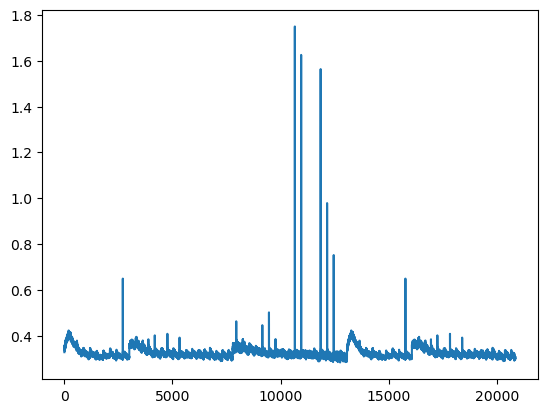

In [299]:
plt.plot(data['mu'])

# Removing the Outliers

In [302]:
from sklearn.neighbors import NearestNeighbors

In [302]:
from sklearn.neighbors import NearestNeighbors

In [306]:
y  = data

In [307]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)

# fit model
nbrs.fit(y)

NearestNeighbors(n_neighbors=3)

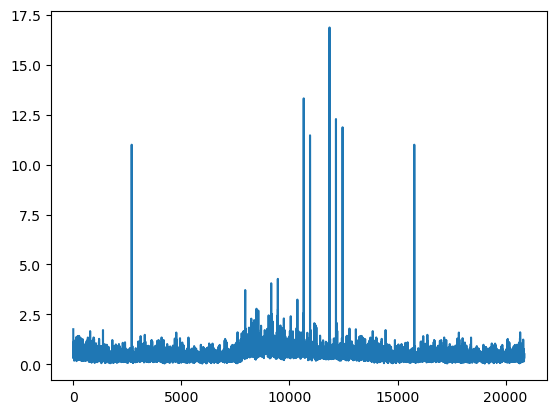

In [308]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(y)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [309]:
temp3 = data

In [310]:
temp3.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos,mu
0,5.9550,167.9449,49.9640,179.6674,16.395,31.5384,14.9,0.327155
1,5.9504,175.1627,49.9947,189.6830,16.705,31.7052,14.9,0.338982
2,5.9550,175.3182,50.0107,193.9427,16.614,31.7636,14.9,0.348493
3,5.9930,179.2381,49.9720,192.3197,16.471,31.9033,14.9,0.348577
4,6.0999,175.8675,49.9880,182.8562,16.311,31.9891,14.9,0.334676


In [311]:
met = np.quantile(distances.mean(axis =1),q=0.75)

In [312]:
temp3.drop(index = np.argwhere(distances.mean(axis =1) > met)[:,0], inplace = True)

C:\Users\spbhatkar.AHEAD\AppData\Local\Temp\ipykernel_13888\1523621231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp3.drop(index = np.argwhere(distances.mean(axis =1) > met)[:,0], inplace = True)


In [313]:
temp3.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos,mu
2,5.9550,175.3182,50.0107,193.9427,16.614,31.7636,14.9,0.348493
3,5.9930,179.2381,49.9720,192.3197,16.471,31.9033,14.9,0.348577
8,6.0043,178.3530,49.9947,188.4290,16.480,32.2139,14.9,0.341339
9,6.0316,178.0391,49.9613,192.2605,16.654,32.2324,14.9,0.344641
11,6.0217,181.7696,50.0440,186.8056,16.487,32.4843,14.9,0.338254


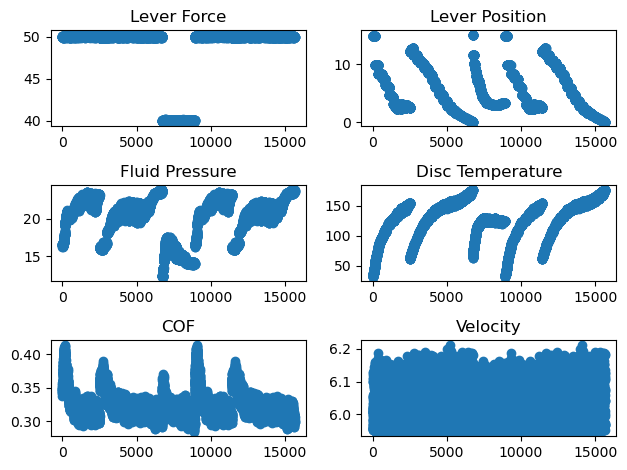

In [316]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 2)

# For Lever Force
axis[0, 0].scatter(np.arange(0,len(temp3),1),temp3['F_lever'])
axis[0, 0].set_title("Lever Force")

# Lever Position
axis[0, 1].scatter(np.arange(0,len(temp3),1),temp3['pos'])
axis[0, 1].set_title("Lever Position")
  
# For Fluid Pressure
axis[1, 0].scatter(np.arange(0,len(temp3),1),temp3['press'])
axis[1, 0].set_title("Fluid Pressure")
  
# For Disc Temperature
axis[1,1].scatter(np.arange(0,len(temp3),1),temp3['temp'])
axis[1,1].set_title("Disc Temperature")
  
# For Velocity
axis[2,1].scatter(np.arange(0,len(temp3),1),temp3['vel'])
axis[2,1].set_title("Velocity")

# For Coefficient of Friction
axis[2,0].scatter(np.arange(0,len(temp3),1),temp3['mu'])
axis[2,0].set_title("COF")


# plt.suptitle(f'Lever force = {metric[-1]} N and Velocity = {int(speed)} kmph', fontsize=14)

figure.tight_layout()
  
# Combine all the operations and display
plt.show()